In [1]:
library(limma)
library(Biobase)
library(readr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




In [2]:
file_name="3old+4old_IgGpos_Normed_Log"
output_folder="../05_Output"

In [3]:
data <- read_tsv(paste(output_folder,"/02_IntermediaryFiles/",file_name,"_MLMcorrected.tsv",sep=""))
names = read.delim("../00_InputData/names.txt",header=FALSE,sep=' ')

Rows: 528 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): Entry, Gene_Name
dbl (18): Intensity 3old-0-R1, Intensity 3old-0-R2, Intensity 3old-0-R3, Int...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:


object <- new("ExpressionSet", exprs=as.matrix(data[c(3:20)]))

object@featureData$NAME <- as.matrix(data[2])
object@featureData$PROT <- as.matrix(data[1])

condition <- c(rep("B",9),rep("A",9))
condition <- factor(paste(condition,rep(c("0","0","0","5","5","5","20","20","20"),2),sep=""))

object@phenoData$CONDITION <- condition

design <- model.matrix(~0+condition)

colnames(design) <- c("A0","A20","A5","B0","B20","B5")

fit <- lmFit(object, design)

contrast.matrix <- makeContrasts(A0 - B0, B5-B0, B20-B0,B20-B5,A5-A0,A20-A0,A20-A5, 
                                 levels = design)

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

topTable(fit2, coef=1,adjust="BH",lfc = 1,number=100)
topTable(fit2, coef=2,adjust="BH",lfc = 1,number=100)

results <- decideTests(fit2,p.value=0.05,method='global')
#vennDiagram(results)

summary(results)

os_sensitive_limma_B_trends <- results@.Data[,2]!=0 | results@.Data[,3]!=0 | results@.Data[,4]!=0
os_sensitive_limma_B <- cbind(data[os_sensitive_limma_B_trends,],results@.Data[os_sensitive_limma_B_trends,c(2:4)])

os_sensitive_limma_A_trends <- results@.Data[,5]!=0 |results@.Data[,6]!=0|results@.Data[,7]!=0
os_sensitive_limma_A <- cbind(data[os_sensitive_limma_A_trends,],results@.Data[os_sensitive_limma_A_trends,c(5:7)])

diff_t0 <- cbind(data,results@.Data[,1])[results@.Data[,1]!=0,]

write.table(os_sensitive_limma_B,paste(output_folder,"/03_DifferentiallyPhos/os_sensitive_",names[1,1],".tsv",sep=""),sep='\t',row.names=FALSE)
write.table(os_sensitive_limma_A,paste(output_folder,"/03_DifferentiallyPhos/os_sensitive_",names[1,2],".tsv",sep=""),sep='\t',row.names=FALSE)
write.table(diff_t0,paste(output_folder,"/03_DifferentiallyPhos/diff_t0_",names[1,1],"_",names[1,2],".tsv",sep=""),sep='\t',row.names=FALSE)

,NAME,PROT,logFC,AveExpr,t,P.Value,adj.P.Val,B
,"<chr[,1]>","<chr[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
393,NA,;GFP-Caax;Cibn-GFP-Caax,4.811512,21.57761,9.393855,8.084105e-08,4.268407e-05,8.3089731
388,SIPA1L1,F6UT09,-2.473140,20.06615,-7.480615,1.530400e-06,4.040257e-04,5.5195242
528,TACC1,E2R4V5,2.191411,18.81635,6.732156,5.487400e-06,9.657825e-04,4.2854041
134,ITGA6,J9NVU0,1.884325,21.43364,6.419348,9.570355e-06,1.263287e-03,3.7447551
448,GOLGB1,F6XPP6,1.029212,19.14448,6.032218,1.940711e-05,2.049391e-03,3.0554791
167,MET,Q75ZY9,1.244061,23.30459,5.797985,3.006382e-05,2.645616e-03,2.6278130
468,EIF2AK2,Q2KM13,1.462274,19.17644,5.692801,3.668150e-05,2.766833e-03,2.4332277
521,TWF1,J9NRP8,-1.513445,19.48095,-5.376364,6.732969e-05,4.443760e-03,1.8386815
438,STOM,F1PFS1,1.908774,19.72300,5.308951,7.675789e-05,4.503130e-03,1.7103064


,NAME,PROT,logFC,AveExpr,t,P.Value,adj.P.Val,B
,"<chr[,1]>","<chr[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,optoSrc,2.053315,26.22377,13.589279,4.645933e-10,2.453052e-07,13.272377680
394,ASAP2,F1P945,3.516980,20.68207,11.280563,6.580667e-09,1.737296e-06,10.797934805
310,PXN,F1PUT6,2.587247,20.81657,6.818874,4.714440e-06,7.653559e-04,4.370118027
391,TNS3,F1PQ78,2.456815,21.16275,6.700838,5.798151e-06,7.653559e-04,4.163941353
307,LOC482885,F1PK38,1.551476,20.81004,5.842183,2.766499e-05,2.921422e-03,2.604067095
297,ARHGEF5,F1PGP2,2.901110,20.56001,5.456836,5.762289e-05,5.070814e-03,1.870908261
298,BCAR1,F1P9X8,2.650292,21.25208,5.237969,8.817002e-05,6.650538e-03,1.446044935
526,RPL28,E2R0A6,1.194404,18.14417,5.008498,1.385993e-04,9.147551e-03,0.994537517
477,PARP1,J9NXE3,-1.398787,18.98167,-4.868609,1.831617e-04,9.879036e-03,0.716483199


       A0 - B0 B5 - B0 B20 - B0 B20 - B5 A5 - A0 A20 - A0 A20 - A5
Down         9       7       11        8       5       18       11
NotSig     499     508      498      507     517      493      508
Up          20      13       19       13       6       17        9

,NAME,PROT,logFC,AveExpr,t,P.Value,adj.P.Val,B
,"<chr[,1]>","<chr[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
502,GTPBP4,F1PJY9,-1.645317,0.0002843917,-5.018892,0.0001481913,0.05952056,1.1590178
521,TWF1,J9NRP8,1.977604,-0.3225202427,4.768296,0.0002423177,0.05952056,0.7176434
500,CYP20A1,F1PLQ3,2.253858,-0.1032151251,4.521105,0.0003962769,0.05952056,0.2742418
310,PXN,F1PUT6,-2.114060,0.7520819667,-4.456705,0.0004509133,0.05952056,0.1575377
526,RPL28,E2R0A6,-1.451497,0.3506032853,-4.073406,0.0009799802,0.09350825,-0.5455918
388,SIPA1L1,F6UT09,1.953448,1.0588260553,4.033754,0.0010625937,0.09350825,-0.6190294
349,NSUN2,F1PRL0,2.065179,0.1505900389,3.589910,0.0026432869,0.15600956,-1.4463604
417,SRSF11,F1P6U8,-1.354980,0.0150374123,-3.481957,0.0033019649,0.15600956,-1.6482109
68,CNOT9,J9NRU2,-2.207947,-0.5757727069,-3.481776,0.0033031956,0.15600956,-1.6485489


,NAME,PROT,logFC,AveExpr,t,P.Value,adj.P.Val,B
,"<chr[,1]>","<chr[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
528,TACC1,E2R4V5,-2.375713,-0.3764928554,-4.915358,0.0001814144,0.09578679,0.8535265
361,KRI1,J9NXZ8,2.795664,0.2164414923,4.105467,0.0009179702,0.11772182,-0.5146456
82,CTNND1,J9P7H5,-1.661331,-0.1245980200,-4.079227,0.0009684132,0.11772182,-0.5602660
457,SAMD9L,J9PAU4,-1.465229,-0.1575171201,-4.075145,0.0009765087,0.11772182,-0.5673677
525,LTBP1,F1PLA1,2.284043,-0.0764248944,4.010284,0.0011147900,0.11772182,-0.6804218
398,RNF40,E2R1L5,-1.813886,-0.1512716709,-3.728973,0.0019851470,0.17253333,-1.1744039
394,ASAP2,F1P945,-1.835988,2.0169624344,-3.579088,0.0027028926,0.17253333,-1.4393125
311,SIPA1L3,J9P197,-1.930989,0.2588812856,-3.420250,0.0037498455,0.17253333,-1.7206115
387,PES1,E2RGA2,3.706072,0.8438355220,3.419271,0.0037574193,0.17253333,-1.7223456


       A5v0 - B5v0 A20v0 - B20v0 A20v5 - B20v5
Down             1             1             6
NotSig         526           527           521
Up               1             0             1

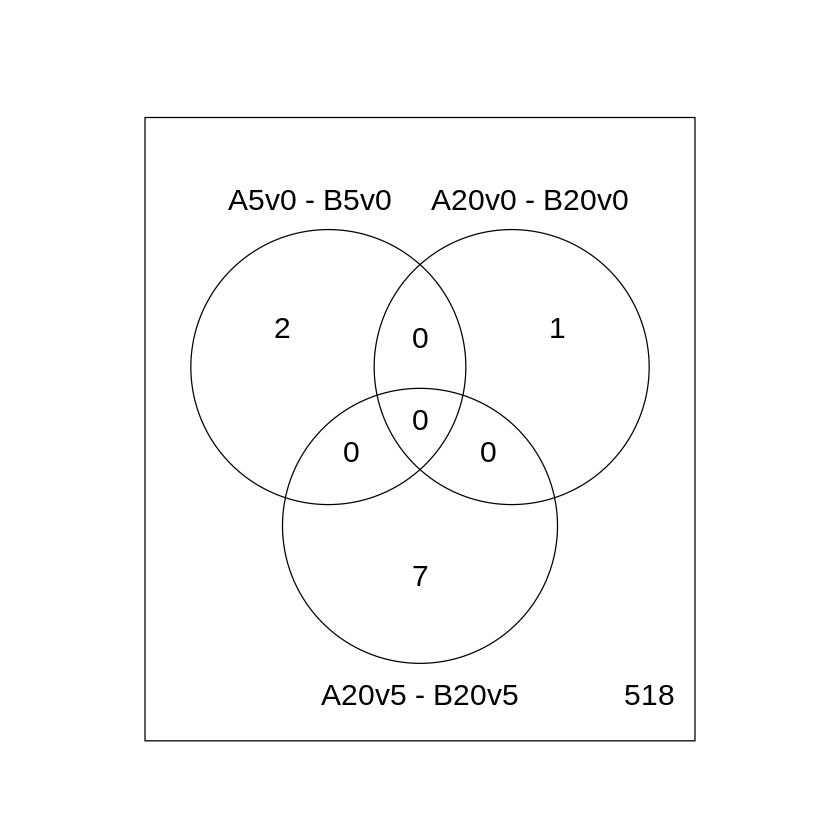

In [5]:
dynamics_B <- as.matrix(data[c(6:11,9:11)]) - as.matrix(cbind(data[c(3:5)],data[c(3:5)],data[c(6:8)]))
dynamics_A <- as.matrix(data[c(15:20,18:20)]) - as.matrix(cbind(data[c(12:14)],data[c(12:14)],data[c(15:17)]))
colnames(dynamics_A) <- c('Intensity 4old-5-0-R1','Intensity 4old-5-0-R2','Intensity 4old-5-0-R3',
                          'Intensity 4old-20-0-R1','Intensity 4old-20-0-R2','Intensity 4old-20-0-R3',
                          'Intensity 4old-20-5-R1','Intensity 4old-20-5-R2','Intensity 4old-20-5-R3')
colnames(dynamics_B) <- c('Intensity 3old-5-0-R1','Intensity 3old-5-0-R2','Intensity 3old-5-0-R3',
                          'Intensity 3old-20-0-R1','Intensity 3old-20-0-R2','Intensity 3old-20-0-R3',
                          'Intensity 3old-20-5-R1','Intensity 3old-20-5-R2','Intensity 3old-20-5-R3')

object <- new("ExpressionSet", exprs=cbind(dynamics_B,dynamics_A))

object@featureData$NAME <- as.matrix(data[2])
object@featureData$PROT <- as.matrix(data[1])

condition <- c(rep("B",9),rep("A",9))
condition <- factor(paste(condition,rep(c("5v0","5v0","5v0","20v0","20v0","20v0","20v5","20v5","20v5"),2),sep=""))

object@phenoData$CONDITION <- condition

design <- model.matrix(~0+condition)

colnames(design) <- c("A20v0","A20v5","A5v0","B20v0","B20v5","B5v0")

fit <- lmFit(object, design)

contrast.matrix <- makeContrasts(A5v0 - B5v0, A20v0-B20v0, A20v5-B20v5,levels = design)

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

topTable(fit2, coef=1,adjust="BH",lfc = 1,number=100)
topTable(fit2, coef=2,adjust="BH",lfc = 1,number=100)

results <- decideTests(fit2,p.value=0.05,method='global')
vennDiagram(results)

summary(results)

os_dynamic_trends <- results@.Data[,1]!=0 | results@.Data[,2]!=0 | results@.Data[,3]!=0
os_dynamic <- cbind(data[os_dynamic_trends,],results@.Data[os_dynamic_trends,c(1:3)])

write.table(os_dynamic,paste(output_folder,"/03_DifferentiallyPhos/os_dynamic_",names[1,2],'_',names[1,1],".tsv",sep=""),sep='\t',row.names=FALSE)